In [74]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import sqlite3
import traceback, sys
import pickle
%matplotlib inline
sns.set(color_codes=True)

In [75]:
def get_data_from_consumption(db_path, table_name):
    try:
        conn = sqlite3.connect(db_path)
        print("successfully connected to database")
            
    except:
        print("Error in connecting database!")
        print("-"*60)
        traceback.print_exc(file=sys.stdout)
        print("-"*60)
    df = pd.read_sql('SELECT * FROM {}'.format(table_name), conn)
    conn.close()
    return df

In [76]:
df = get_data_from_consumption("../../database/data.db", "CONSUMPTION")
df.head()

successfully connected to database


,unique_data,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,RawTimeStamp,ConsumptionTimeStamp
0,2549.026455,842,0,2.2,0,1,0,7,0.6,188,...,2549,9,7,19,0,0,1,1,2023-05-29 12:46:43,2023-05-29 14:32:00
1,2631.455231,1021,1,0.5,1,0,1,53,0.7,136,...,2631,17,3,7,1,1,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
2,2603.736014,563,1,0.5,1,2,1,41,0.9,145,...,2603,11,2,9,1,1,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
3,2769.680851,615,1,2.5,0,0,0,10,0.8,131,...,2769,16,8,11,1,0,0,2,2023-05-29 12:46:43,2023-05-29 14:32:00
4,1411.996700,1821,1,1.2,0,13,1,44,0.6,141,...,1411,8,2,15,1,1,0,1,2023-05-29 12:46:43,2023-05-29 14:32:00


In [77]:
df = df.drop(['unique_data', 'RawTimeStamp', 'ConsumptionTimeStamp'], axis=1)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [78]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [79]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [81]:
get_unique_values = {}
for i in df.columns:
    get_unique_values[i] = {
        "count": len(df[i].unique()),
        "items": df[i].unique()
    }
print(get_unique_values)

{'battery_power': {'count': 1094, 'items': array([ 842, 1021,  563, ..., 1139, 1467,  858])}, 'blue': {'count': 2, 'items': array([0, 1])}, 'clock_speed': {'count': 26, 'items': array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])}, 'dual_sim': {'count': 2, 'items': array([0, 1])}, 'fc': {'count': 20, 'items': array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])}, 'four_g': {'count': 2, 'items': array([0, 1])}, 'int_memory': {'count': 63, 'items': array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])}, 'm_dep': {'count': 10, 'items': array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])}, 'mobile_wt': {'count': 121, 'items': ar

In [82]:
for i, j in get_unique_values.items():
    if j['count'] < 10:
        print(f"{i} ---> {j['count']}")

blue ---> 2
dual_sim ---> 2
four_g ---> 2
n_cores ---> 8
three_g ---> 2
touch_screen ---> 2
wifi ---> 2
price_range ---> 4


In [83]:
for i, j in get_unique_values.items():
    if j['count'] < 10:
        print(f"{i} ---> {j['items']}")

blue ---> [0 1]
dual_sim ---> [0 1]
four_g ---> [0 1]
n_cores ---> [2 3 5 6 1 8 4 7]
three_g ---> [0 1]
touch_screen ---> [0 1]
wifi ---> [1 0]
price_range ---> [1 2 3 0]


In [84]:
for cols, value in get_unique_values.items():
    if value["count"] < 10:
        df[cols] = df[cols].astype("object")


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [93]:
ct = [x for x in df.columns if df[x].dtype == "object"]
nt = [x for x in df.columns if x not in ct]
ct, nt, len(ct), len(nt)

(['blue',
  'dual_sim',
  'four_g',
  'n_cores',
  'three_g',
  'touch_screen',
  'wifi',
  'price_range'],
 ['battery_power',
  'clock_speed',
  'fc',
  'int_memory',
  'm_dep',
  'mobile_wt',
  'pc',
  'px_height',
  'px_width',
  'ram',
  'sc_h',
  'sc_w',
  'talk_time'],
 8,
 13)

In [13]:
df["talk_time"]

0       19
1        7
2        9
3       11
4       15
        ..
1995    19
1996    16
1997     5
1998    19
1999     2
Name: talk_time, Length: 2000, dtype: int64

In [71]:
X = df.drop(["price_range"], axis=1)
y = df["price_range"]

In [72]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [73]:
y = np.array(y, dtype=np.float32)
y

array([1., 2., 2., ..., 3., 0., 3.], dtype=float32)

In [74]:
categorical_data = [i for i in range(len(X.columns)) if df[X.columns[i]].dtype == "O"]
categorical_data

[1, 3, 5, 9, 17, 18, 19]

In [75]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_data)
    ], 
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))



In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [78]:
X_train.shape

(1600, 33)

# Modelling

In [60]:
trainedforest = RandomForestClassifier()
trainedforest.fit(X_train, y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[101   4   0   0]
 [  9  75   7   0]
 [  0  11  71  10]
 [  0   0  18  94]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       105
         1.0       0.83      0.82      0.83        91
         2.0       0.74      0.77      0.76        92
         3.0       0.90      0.84      0.87       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [61]:
grid = { 
    'n_estimators': [100, 200,300,400],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [None,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'random_state' : [18, None, 42],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [20, 30, 40, 50]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5, n_jobs=6, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [18, None, 42]},
             verbose=1)

In [62]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200)

In [63]:
trainedforest = RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)
trainedforest.fit(X_train, y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[ 99   6   0   0]
 [  6  75  10   0]
 [  0   7  78   7]
 [  0   0  10 102]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       105
         1.0       0.85      0.82      0.84        91
         2.0       0.80      0.85      0.82        92
         3.0       0.94      0.91      0.92       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [64]:
trainedforest = RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200)
trainedforest.fit(X_train, y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[ 99   6   0   0]
 [  6  82   3   0]
 [  0   7  76   9]
 [  0   0   9 103]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       105
         1.0       0.86      0.90      0.88        91
         2.0       0.86      0.83      0.84        92
         3.0       0.92      0.92      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [65]:
predictionforest 

array([0., 2., 1., 3., 1., 1., 2., 0., 3., 1., 0., 1., 2., 3., 2., 2., 3.,
       3., 1., 0., 0., 1., 1., 2., 0., 1., 2., 2., 2., 0., 0., 0., 3., 0.,
       1., 1., 2., 0., 3., 0., 2., 3., 2., 0., 2., 2., 2., 1., 3., 1., 3.,
       1., 0., 0., 1., 1., 1., 3., 0., 0., 0., 3., 3., 1., 0., 0., 3., 3.,
       1., 2., 2., 2., 0., 1., 3., 0., 0., 3., 2., 1., 3., 2., 1., 0., 1.,
       3., 2., 3., 3., 0., 3., 3., 2., 1., 3., 2., 2., 3., 2., 1., 0., 0.,
       1., 0., 0., 3., 2., 0., 1., 1., 0., 0., 3., 1., 2., 2., 3., 3., 0.,
       2., 1., 3., 2., 1., 3., 3., 0., 3., 0., 2., 3., 0., 2., 2., 0., 3.,
       1., 0., 0., 2., 3., 1., 2., 2., 0., 0., 0., 1., 1., 2., 3., 1., 1.,
       0., 2., 2., 0., 1., 0., 2., 2., 3., 2., 2., 1., 0., 1., 2., 2., 3.,
       3., 1., 1., 0., 3., 1., 1., 2., 1., 0., 0., 0., 0., 0., 3., 2., 0.,
       3., 0., 0., 0., 0., 1., 3., 3., 1., 0., 1., 1., 1., 1., 2., 2., 3.,
       3., 3., 1., 2., 0., 0., 0., 2., 1., 1., 3., 1., 0., 2., 1., 1., 3.,
       2., 3., 0., 0., 2.

# using ICA for Feature Selection

In [14]:
X = df.drop(["price_range"], axis=1)
y = df["price_range"]
y = np.array(y, dtype=np.float32)

categorical_data = [i for i in range(len(X.columns)) if df[X.columns[i]].dtype == "O"]

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_data)
    ], 
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [15]:
X.shape

(2000, 33)

In [16]:

from sklearn.decomposition import FastICA

ica = FastICA(n_components=33)
X_ica = ica.fit_transform(X)
X_ica.shape

/home/deborshi/.local/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/deborshi/.local/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(2000, 33)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ica, y,
    test_size=0.2,
    random_state=42
)

trainedforest = RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200)
trainedforest.fit(X_train, y_train)

predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[72 19 11  3]
 [35 18 27 11]
 [19  9 29 35]
 [ 6 12 22 72]]
              precision    recall  f1-score   support

         0.0       0.55      0.69      0.61       105
         1.0       0.31      0.20      0.24        91
         2.0       0.33      0.32      0.32        92
         3.0       0.60      0.64      0.62       112

    accuracy                           0.48       400
   macro avg       0.44      0.46      0.45       400
weighted avg       0.46      0.48      0.46       400



# Using Linear Discrimination Analysis

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = df.drop(["price_range"], axis=1)
y = df["price_range"]
y = np.array(y, dtype=np.float32)
lda = LinearDiscriminantAnalysis(n_components=3)


# run an LDA and use it to transform the features

X_lda = lda.fit(X, y).transform(X)
print(lda.explained_variance_ratio_)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

[9.96836231e-01 2.35290778e-03 8.10860797e-04]
Original number of features: 20
Reduced number of features: 3


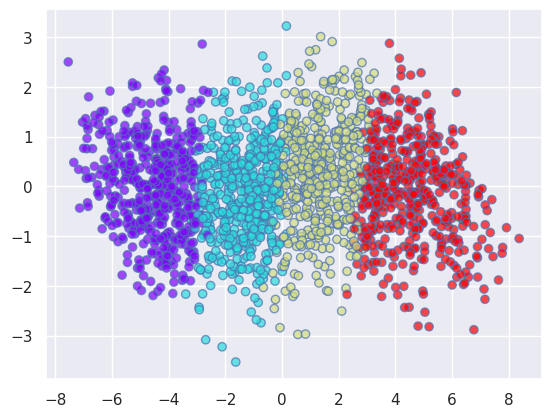

In [60]:
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [61]:
# scaler1 = StandardScaler()
# X_LDA = scaler1.fit_transform(X_lda)

In [62]:
X_lda.max()

8.372764288588899

In [63]:
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y
def inverse_transform(lda, x):
    if lda.solver == 'lsqr':
        raise NotImplementedError("(inverse) transform not implemented for 'lsqr' "
                                  "solver (use 'svd' or 'eigen').")
    check_is_fitted(lda, ['xbar_', 'scalings_'], all_or_any=any)

    inv = np.linalg.pinv(lda.scalings_)

    x = check_array(x)
    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)

    return x_back
Xr = inverse_transform(lda, X_lda)
Xr

array([[ 1.23840846e+03, -3.50087964e-01,  3.98360435e+00, ...,
        -3.68696696e-01, -9.04928520e-01,  4.30521433e+00],
       [ 1.23882568e+03,  2.24257353e+00, -5.62718703e+00, ...,
         6.08888665e+00,  3.38491110e+00, -1.04810801e+01],
       [ 1.23870113e+03,  1.37886728e+00, -2.89812079e+00, ...,
         4.44616130e+00,  2.04931046e+00, -6.11802776e+00],
       ...,
       [ 1.23913467e+03,  3.65453976e+00, -1.27142042e+01, ...,
         1.27649330e+01,  5.42987898e+00, -2.17656884e+01],
       [ 1.23799012e+03, -1.98143499e+00,  1.38411210e+01, ...,
        -1.03578412e+01, -3.32713953e+00,  1.97530016e+01],
       [ 1.23898420e+03,  2.78472055e+00, -9.10878364e+00, ...,
         1.02416193e+01,  3.88527465e+00, -1.63980187e+01]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y,
    test_size=0.2,
    random_state=42
)

trainedforest = RandomForestClassifier(criterion='entropy', max_depth=6, max_features=None,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200, random_state=42)
trainedforest.fit(X_train, y_train)

predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[102   3   0   0]
 [  0  90   1   0]
 [  0   0  88   4]
 [  0   0   5 107]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       105
         1.0       0.97      0.99      0.98        91
         2.0       0.94      0.96      0.95        92
         3.0       0.96      0.96      0.96       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [65]:
# save the model
filename = '../saved_model/finalized_model.sav'
pickle.dump(trainedforest, open(filename, 'wb'))

### 3 features are enough to get me 97% accuracy, whereas using iCA we are not getting good results

In [51]:
X_lda[:, 0].min()

-7.548598300604962

In [53]:
X_lda[:, 1].max()

3.220512869772955

In [54]:
X_lda[:, 2].max()

3.227957809901699

# BackTrack the columns needed

In [45]:
X_lda[:, 0].max()

8.372764288588886

In [70]:
for i in X.columns:
    if X_lda[:, 2].min() == X[i].min():
        print(i)

In [95]:
len(X.columns)

20

In [96]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')